In [295]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch

In [296]:
# Load and prepare the data

In [297]:
df = pd.read_csv("datasets/laptop_pricing_dataset.csv")

In [298]:
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [300]:
df = df.drop("Unnamed: 0", axis=1)

In [301]:
weight_mean = df["Weight_kg"].mean()
df["Weight_kg"] = df["Weight_kg"].fillna(weight_mean)

In [302]:
screen_mean = df["Screen_Size_cm"].mean()
df["Screen_Size_cm"] = df["Screen_Size_cm"].fillna(screen_mean)

In [303]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

Text(0.5, 1.0, 'Count Manufacturer')

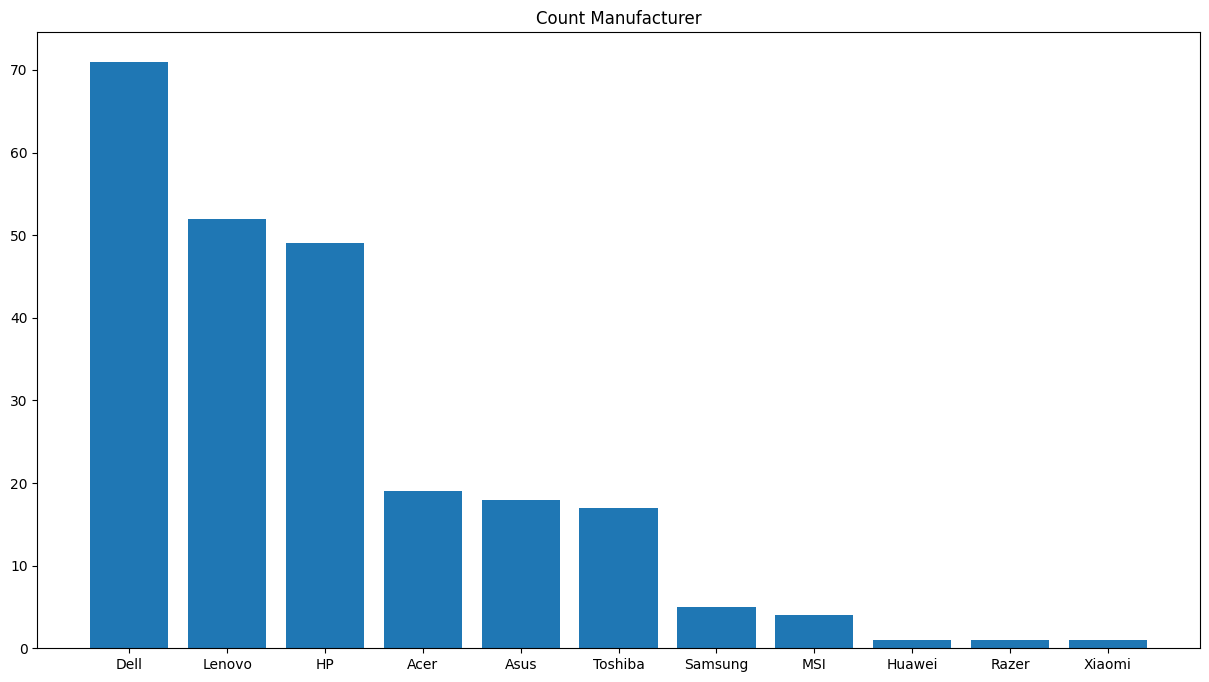

In [304]:
value = df["Manufacturer"].value_counts()
plt.figure(figsize=(15, 8))
plt.bar(value.index, value)
plt.title("Count Manufacturer")

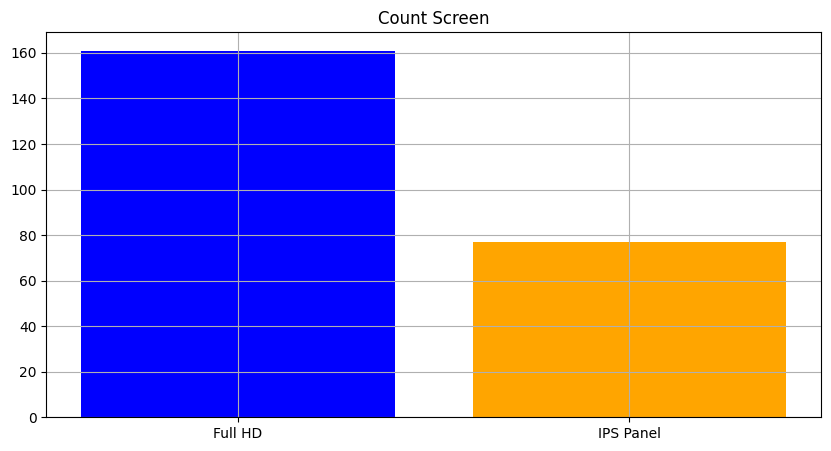

In [305]:
value_screen = df["Screen"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(value_screen.index, value_screen, color=["blue", "orange"])
plt.title("Count Screen")
plt.grid(True)

Text(0.5, 1.0, 'The manufacturer of the GPU.')

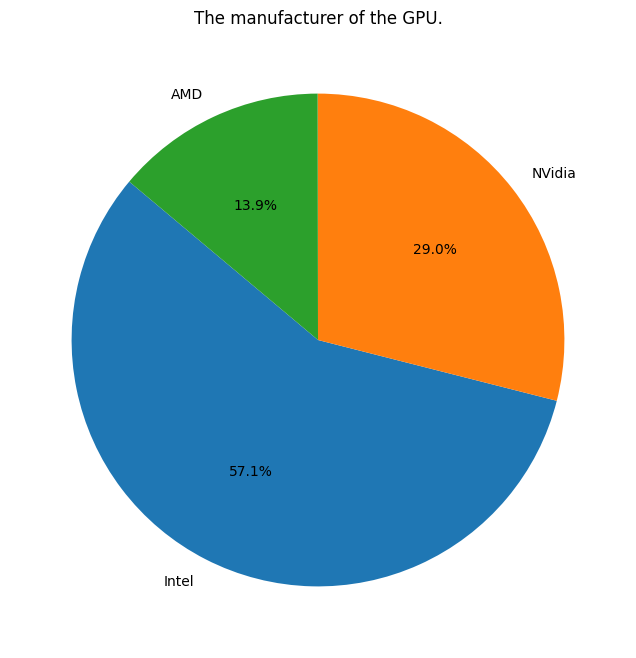

In [306]:
gpu = {1:'AMD', 2: "Intel", 3:"NVidia"}
gpu_count = df["GPU"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gpu_count, labels=[gpu[i] for i in gpu_count.index], autopct='%1.1f%%', startangle=140)
plt.title("The manufacturer of the GPU.")

Text(0.5, 1.0, 'CPU core')

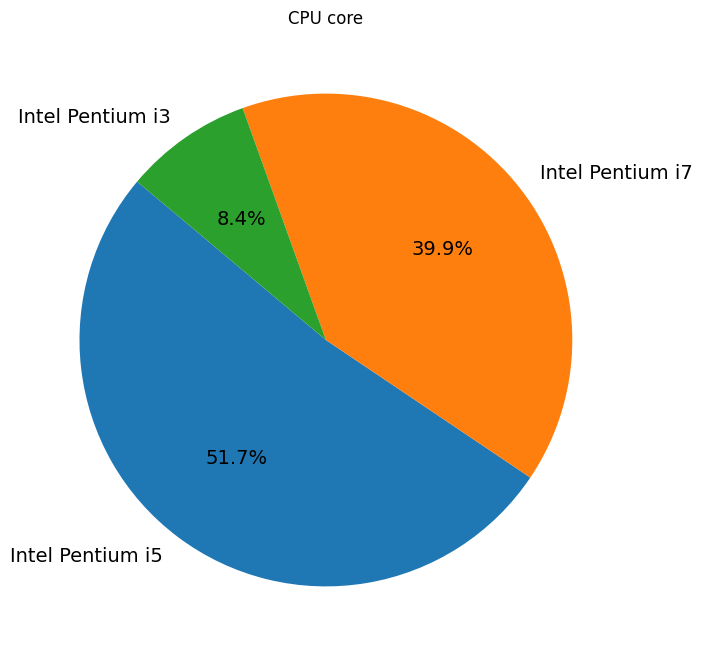

In [307]:
cpu = {3:"Intel Pentium i3",
5: "Intel Pentium i5",
7:"Intel Pentium i7"}
cpu_count = df["CPU_core"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cpu_count, labels=[cpu[i] for i in cpu_count.index], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title("CPU core")

In [308]:
from sklearn.preprocessing import LabelEncoder

In [309]:
encoder = LabelEncoder()
def encode_data(column):
    return encoder.fit_transform(column)

In [310]:
df["Manufacturer"] = encode_data(df["Manufacturer"])
df["Screen"] = encode_data(df["Screen"])

In [311]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,4,1,2,1,5,35.560,1.6,8,256,1.60,978
1,2,3,0,1,1,3,39.624,2.0,4,256,2.20,634
2,2,3,0,1,1,7,39.624,2.7,8,256,2.20,946
3,2,4,1,2,1,5,33.782,1.6,8,128,1.22,1244
4,3,4,0,2,1,7,39.624,1.8,8,256,1.91,837


In [312]:
df.dtypes

Manufacturer        int32
Category            int64
Screen              int32
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [313]:
df.describe()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.382353,3.205882,0.323529,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,2.365545,0.776533,0.468809,0.638282,0.235790,1.241787,2.946184,0.411393,2.482603,34.765316,0.489090,574.607699
min,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,2.000000,3.000000,0.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,3.000000,3.000000,0.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,5.000000,4.000000,1.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,10.000000,5.000000,1.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


array([[<Axes: title={'center': 'Manufacturer'}>,
        <Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'Screen'}>],
       [<Axes: title={'center': 'GPU'}>, <Axes: title={'center': 'OS'}>,
        <Axes: title={'center': 'CPU_core'}>],
       [<Axes: title={'center': 'Screen_Size_cm'}>,
        <Axes: title={'center': 'CPU_frequency'}>,
        <Axes: title={'center': 'RAM_GB'}>],
       [<Axes: title={'center': 'Storage_GB_SSD'}>,
        <Axes: title={'center': 'Weight_kg'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

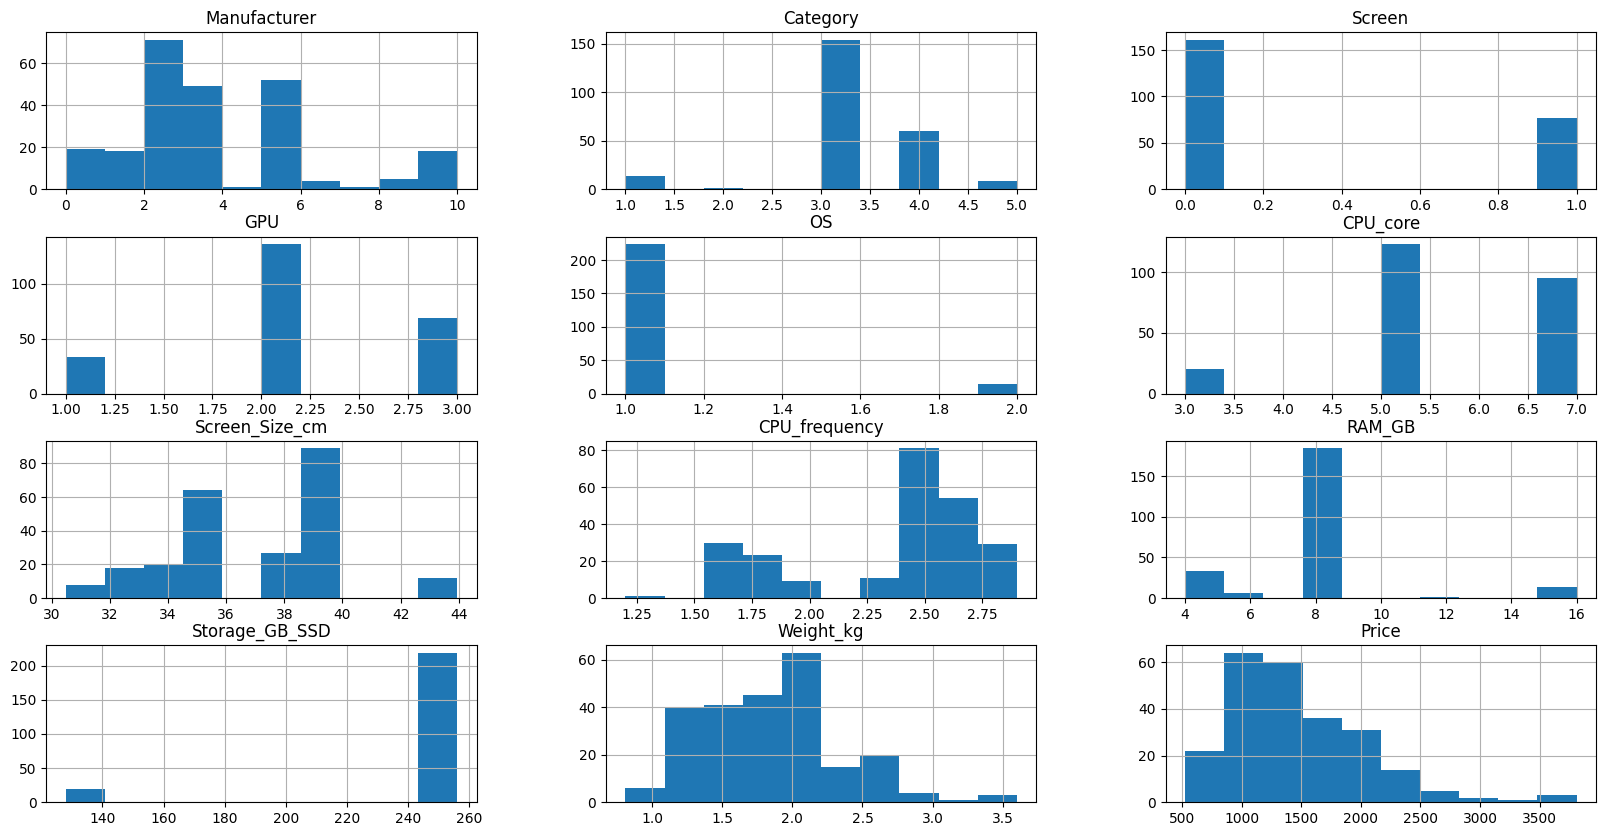

In [314]:
df.hist(figsize=(20, 10))

In [315]:
df.corr()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
Manufacturer,1.000000,-0.063708,0.180949,0.003452,-0.191789,0.026785,-0.257892,0.177906,0.073792,-0.024531,-0.263237,0.231578
Category,-0.063708,1.000000,0.117608,-0.114174,-0.043378,0.232425,-0.305035,-0.053414,0.030127,0.038246,-0.381032,0.286243
Screen,0.180949,0.117608,1.000000,0.089582,-0.172891,-0.003837,-0.335416,-0.055273,-0.017913,-0.061402,-0.117909,0.021075
GPU,0.003452,-0.114174,0.089582,1.000000,-0.199549,0.145388,0.152979,0.291439,0.218973,0.094288,0.262853,0.288298
OS,-0.191789,-0.043378,-0.172891,-0.199549,1.000000,0.016954,0.150835,0.050407,-0.074625,0.007751,0.120858,-0.221730
CPU_core,0.026785,0.232425,-0.003837,0.145388,0.016954,1.000000,0.037293,0.242722,0.473075,0.400015,0.068599,0.459398
Screen_Size_cm,-0.257892,-0.305035,-0.335416,0.152979,0.150835,0.037293,1.000000,-0.002262,0.017651,0.116368,0.810703,-0.126672
CPU_frequency,0.177906,-0.053414,-0.055273,0.291439,0.050407,0.242722,-0.002262,1.000000,0.226736,0.035557,0.066522,0.366666
RAM_GB,0.073792,0.030127,-0.017913,0.218973,-0.074625,0.473075,0.017651,0.226736,1.000000,0.361469,0.055068,0.549297
Storage_GB_SSD,-0.024531,0.038246,-0.061402,0.094288,0.007751,0.400015,0.116368,0.035557,0.361469,1.000000,0.112519,0.243421


Text(0.5, 1.0, 'Latop Pricing Heatmap')

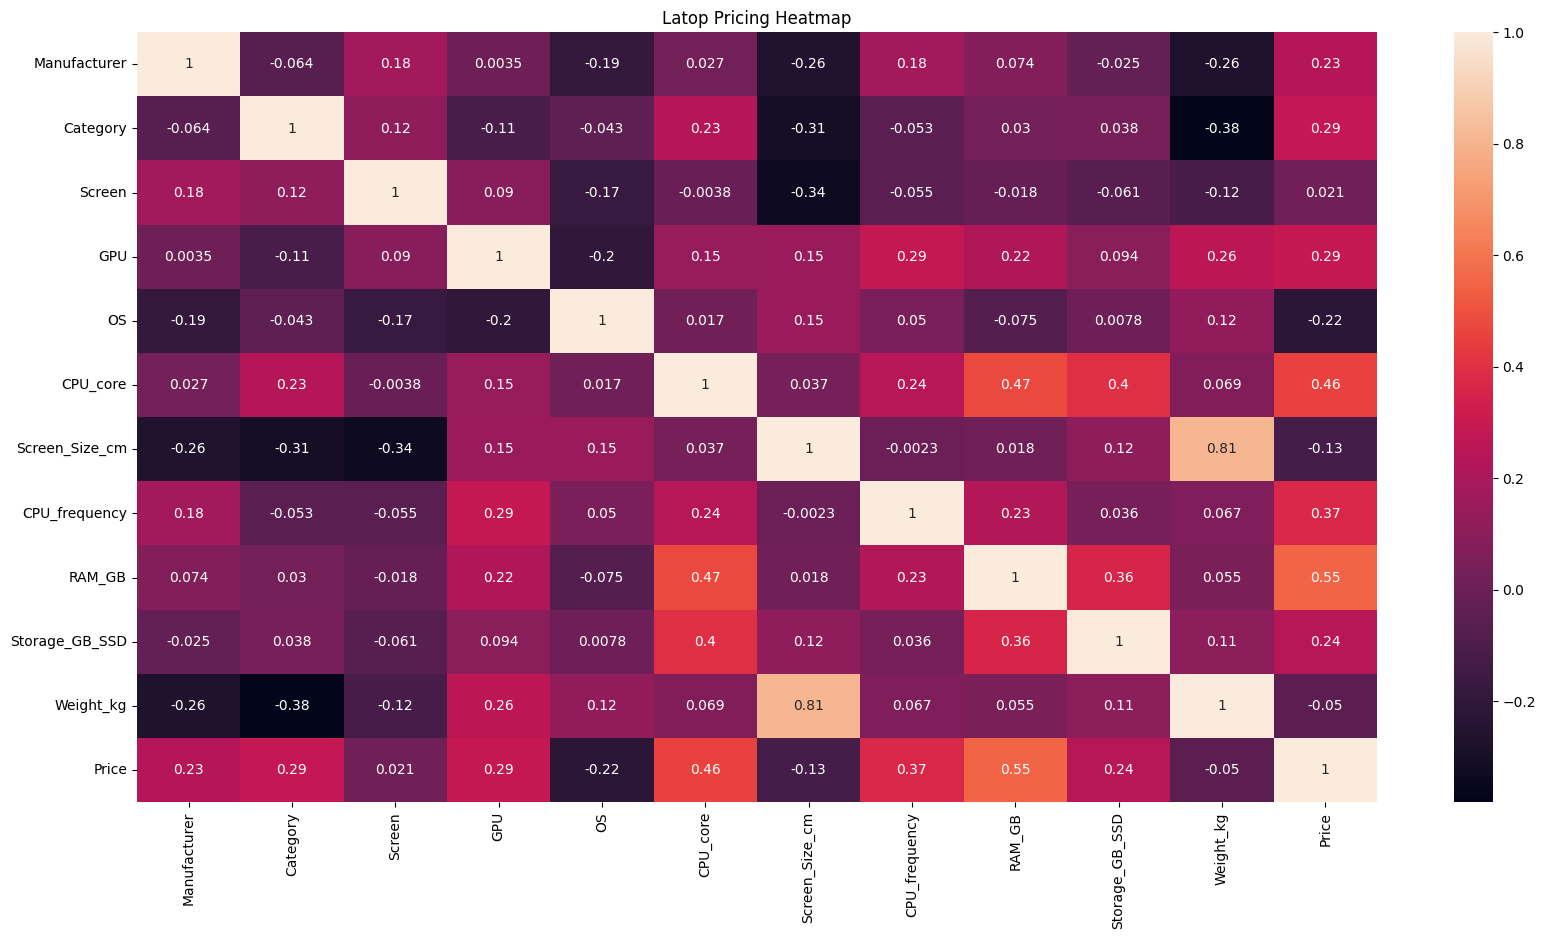

In [316]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), annot=True)
plt.title("Latop Pricing Heatmap")

In [317]:
# Split the data

In [318]:
X, y = df.drop("Price", axis=1), df["Price"]

In [319]:
from sklearn.preprocessing import StandardScaler

In [320]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.1)

In [322]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (214, 11)
X_test shape (24, 11)
y_train shape (214,)
y_test shape (24,)


In [323]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [324]:
y_train_tensor.dtype

torch.float32

In [325]:
# Build a model

In [359]:
class ModelRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(X_train_tensor.shape[1], 32)
        self.linear2 = nn.Linear(32, 64)
        self.linear3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.dropout(torch.relu(self.linear1(x)))
        x = self.dropout(torch.relu(self.linear2(x)))
        x = torch.relu(self.linear3(x))
        return x

In [360]:
model = ModelRegression()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.L1Loss()

In [361]:
epochs = 3000
best_loss = float("inf")
patience = 0

for epoch in range(epochs):
    # Training
    model.train()
    train_pred = model(X_train_tensor)
    train_loss = loss_fn(train_pred.squeeze(), y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # evaluation
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_tensor)
        test_loss = loss_fn(test_pred.squeeze(), y_test_tensor)
        
        if test_loss < best_loss:
            best_loss = test_loss
            patience = 0
        else:
            patience += 1

        if patience > 100:
            print("Stop")
            break

    if epoch % 100 == 0:
        print(f"Epoch = {epoch}, train loss = {train_loss}, test loss = {train_loss}")
   

Epoch = 0, train loss = 1489.68359375, test loss = 1489.68359375
Epoch = 100, train loss = 1473.6688232421875, test loss = 1473.6688232421875
Epoch = 200, train loss = 1339.6510009765625, test loss = 1339.6510009765625
Epoch = 300, train loss = 895.2465209960938, test loss = 895.2465209960938
Epoch = 400, train loss = 446.80712890625, test loss = 446.80712890625
Epoch = 500, train loss = 353.5371398925781, test loss = 353.5371398925781
Epoch = 600, train loss = 342.8648986816406, test loss = 342.8648986816406
Epoch = 700, train loss = 329.1938781738281, test loss = 329.1938781738281
Epoch = 800, train loss = 316.7206115722656, test loss = 316.7206115722656
Epoch = 900, train loss = 314.3907470703125, test loss = 314.3907470703125
Epoch = 1000, train loss = 309.16796875, test loss = 309.16796875
Epoch = 1100, train loss = 300.7116394042969, test loss = 300.7116394042969
Epoch = 1200, train loss = 298.7898864746094, test loss = 298.7898864746094
Stop


In [362]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,4,1,2,1,5,35.560,1.6,8,256,1.60,978
1,2,3,0,1,1,3,39.624,2.0,4,256,2.20,634
2,2,3,0,1,1,7,39.624,2.7,8,256,2.20,946
3,2,4,1,2,1,5,33.782,1.6,8,128,1.22,1244
4,3,4,0,2,1,7,39.624,1.8,8,256,1.91,837


In [374]:
data = np.array([0, 2, 1, 2, 1, 7, 36, 2.7, 8, 256, 1.60]).reshape(1, -1)
data = scaler.transform(data)
data = torch.tensor(data, dtype=torch.float32)
model.eval()
with torch.no_grad():
    test_pred = model(data)
    print(test_pred)

tensor([[1035.0093]])


C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
